In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
n_values = [2, 10, 20, 100, 200, 300]

In [3]:
def my_langrange(x, y, x_val):
    '''
        x: list of x values
        y: list of y values
        x_val: point to evaluate
    '''
    n = len(x) #get the length of x values
    y_val = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if i != j:
                l *= (x_val - x[j]) / (x[i] - x[j]) #calculate the lagrange polynomial
        y_val += l * y[i] #evaluate the lagrange polynomial
    return y_val

In [9]:
#!pip install mpmath
import mpmath as mp
mp.mp.dps = 150  # Set the precision to 100 decimal places
#check the accuracy
def newton_divided_difference(x, y):
    '''
    Calculates the coefficients of the Newton polynomial using divided differences with high precision.

    x: list of x values (using mpmath for high precision)
    y: list of y values (using mpmath for high precision)
    Returns: list of coefficients of the polynomial with high precision
    '''
    n = len(x)
    F = mp.matrix(n, n)
    
    # Initialize the first column with the y values
    for i in range(n):
        F[i, 0] = mp.mpf(y[i])  # Convert to mpmath's mpf type for high precision
    
    # Calculate divided differences
    for j in range(1, n):
        for i in range(j, n):
            F[i, j] = (F[i, j - 1] - F[i - 1, j - 1]) / (mp.mpf(x[i]) - mp.mpf(x[i - j]))
    
    # Extract the diagonal (divided differences coefficients)
    co_eff = [F[i, i] for i in range(n)]
    
    return co_eff

Defaulting to user installation because normal site-packages is not writeable


In [10]:
def newton_polynomial(co_eff, x_values, x):
    '''
    Evaluates the Newton polynomial at a given x with high precision.

    co_eff: coefficients of the Newton polynomial (using mpmath for high precision)
    x_values: original x values used to generate the polynomial (using mpmath)
    x: point at which to evaluate the polynomial (using mpmath)
    Returns: y value at the given x with high precision
    '''
    n = len(x_values)
    result = mp.mpf(co_eff[0])  # Start with the first coefficient
    
    # Compute the Newton polynomial
    for i in range(1, n):
        term = mp.mpf(co_eff[i])
        for j in range(i):
            term *= (mp.mpf(x) - mp.mpf(x_values[j]))  # Multiply by (x - x_0)(x - x_1)...(x - x_{i-1})
        result += term
    
    return result

In [11]:
for n in n_values:
    lagrange_errors = []
    newton_errors = []
    x_points = np.linspace(0, 15, n+1)
    print(f"n = {n}, x_points: {x_points}")
    x_evaluation = np.arange(0, 15.05, 0.05)
    print(f"n = {n}, x_evaluation: {x_evaluation}")
    y_eval_points = [-x ** 2 + 3 * x for x in x_evaluation]
    y_points = [-x ** 2 + 3 * x for x in x_points]
    print(f"n = {n}, y_points: {y_points}")
    print(f"n = {n}, y_eval_points: {y_eval_points}")
    lagrange_y_points = [my_langrange(x_points, y_points, x) for x in x_evaluation]
    newton_co_eff = newton_divided_difference(x_points, y_points)
    newton_y_points = [newton_polynomial(newton_co_eff, x_points, x) for x in x_evaluation]
    for i in range(len(y_eval_points)):
        lagrange_errors.append(np.abs(y_eval_points[i] - lagrange_y_points[i])) #calculate the norm error and store it in the array for each n
        newton_errors.append(np.abs(y_eval_points[i] - newton_y_points[i])) #calculate the norm error and store it in the array for each n
    # print(f"n = {n}, Newton Errors: {newton_errors}")
    # print(f"n = {n}, Lagrange Errors: {lagrange_errors}")
    plt.plot(x_evaluation, lagrange_errors, label='Lagrange Error in n = {}'.format(n), linestyle='-', marker='o')
    plt.plot(x_evaluation, newton_errors, label='Newton Error in n = {}'.format(n), linestyle='--', marker='x')
    plt.legend()
    plt.savefig('error_plot_n_{}.png'.format(n))
    plt.clf()

n = 2, x_points: [ 0.   7.5 15. ]
n = 2, x_evaluation: [ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.    4.05  4.1   4.15
  4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7   4.75
  4.8   4.85  4.9   4.95  5.    5.05  5.1   5.15  5.2   5.25  5.3   5.35
  5.4   5.45  5.5   5.55  5.6   5.65  5.7   5.75  5.8   5.85  5.9   5.95
  6.    6.05  6.1   6.15  6.2   6.25  6.3   6.35  6.4   6.45  6.5   6.55
  6.6   6.65  6.7   6.75  6.8   6.85  6.9   6.95  7.    7.05  7.1   7.15
  7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.55  7.6   7.65  7.7   7

<Figure size 640x480 with 0 Axes>

newton_co_eff: [mpf('0.0'), mpf('2.93181818181818183668553525890412552812586199203300612228698973882369055717454230186151636346979153598697194721719346355085479780507222349733929767625068'), mpf('-0.999999999999999802627017844416580340527520118979040634437161123948607576886745650318936891299348905065956207534028872290787648304421328314594908815765119'), mpf('-0.0000000000000145946355138378635399573976848743527943376185772667537366959636228315755094412134193762752965739869226971827268259178763856664492238877563447112164485174'), mpf('0.000000000000214054654202955347762602207664628041854565759590989394267407280703878587977060518704030807686590986726381055666449456782350466531156529735806741989149817'), mpf('-0.00000000000109881389157517086650992347966009153218069771405576914126022980417075288128431494607301677212649729836840995649940031999839179902736883466776257620833824'), mpf('-0.0000000000023022767252051200811854054399478253636840452450730283173018713519948225626798247607302345014144

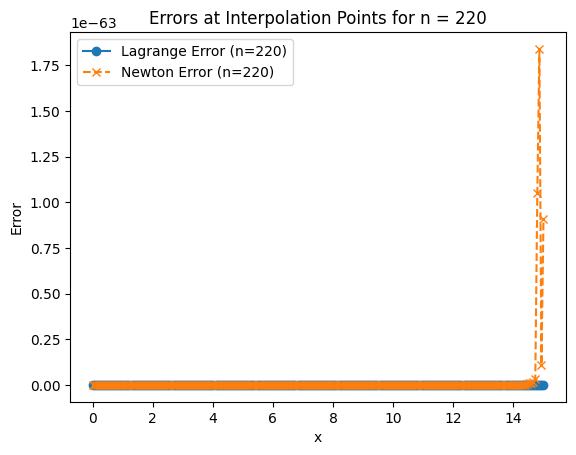

In [12]:
#n = 100 -> check the validatity of the codes. 
import numpy as np
import matplotlib.pyplot as plt

# We can conclude that this is the problem of python. Following is the evidence for this.
n = 220
lagrange_errors = []
newton_errors = []

# Generate interpolation points
x_points = np.linspace(0, 15, n + 1)

y_points = [-x ** 2 + 3 * x for x in x_points]  # The actual function we're interpolating

# Use the same interpolation points for evaluation
x_evaluation = x_points  # Evaluate at the same points to check for exact matches
y_eval_points = y_points  # These are the actual function values at the interpolation points

# Calculate Lagrange polynomial interpolation at the evaluation points
lagrange_y_points = [my_langrange(x_points, y_points, x) for x in x_evaluation]

# Calculate Newton polynomial interpolation at the evaluation points
newton_co_eff = newton_divided_difference(x_points, y_points)

newton_y_points = [newton_polynomial(newton_co_eff, x_points, x) for x in x_evaluation]

# Calculate the errors for each interpolation method at the interpolation points
for i in range(len(y_eval_points)):
    lagrange_errors.append(np.abs(y_eval_points[i] - lagrange_y_points[i]))  # Should be 0 or very close
    newton_errors.append(np.abs(y_eval_points[i] - newton_y_points[i]))      # Should be 0 or very close

# Print results for n = 5
print(f"newton_co_eff: {newton_co_eff}")
# print(f"x_points: {x_points}")
# print(f"y_eval_points (actual): {y_eval_points}")
# print(f"Lagrange interpolated values: {lagrange_y_points}")
# print(f"Newton interpolated values: {newton_y_points}")
# print(f"Lagrange Errors at interpolation points: {lagrange_errors}")
# print(f"Newton Errors at interpolation points: {newton_errors}")

# Plot the errors for visual check
plt.plot(x_evaluation, lagrange_errors, label='Lagrange Error (n=220)', linestyle='-', marker='o')
plt.plot(x_evaluation, newton_errors, label='Newton Error (n=220)', linestyle='--', marker='x')
plt.legend()
plt.title("Errors at Interpolation Points for n = 220")
plt.xlabel("x")
plt.ylabel("Error")
plt.show()

this is difficult to definitively state which method is superior in all cases. While Lagrange interpolation tends to exhibit larger errors near the boundaries, especially as n (the number of interpolation points) increases, Newton’s method can show even more significant boundary errors when n>60.

The error behavior for both methods is highly dependent on the number and distribution of the interpolation points. Based on my observations, when n≤60, Newton's method generally performs better with lower boundary errors compared to Lagrange interpolation. However, when n>60, the error in Lagrange interpolation grows but remains well-defined, particularly at points where the function should interpolate to zero. This is an important distinction, as Lagrange interpolation still accurately captures these critical points, despite the larger boundary errors.

In contrast, Newton's method, despite its overall lower error at smaller n, can produce larger deviations in boundary behavior when n is large, leading to higher errors in certain cases. This suggests that while Newton’s method might show better performance for smaller sets of points, Lagrange interpolation can still be effective, especially for capturing specific function values at key points.

Overall, the choice of method and its performance depends on how many interpolation points are used and how they are spaced. For n≤60, Newton’s method tends to have lower boundary errors, but as n increases, Lagrange interpolation may be more reliable for accurately representing the function at specific points, despite its susceptibility to boundary oscillations.